<a href="https://colab.research.google.com/github/Jonchyk/Vis/blob/main/PS1_vis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

#SETUP

In [8]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas


note:  pandas is kind of like stata, or more like r, but not really like
the rest of Py, and helps a lot with traditional data

REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


#Research Problem                                         
Note - this is a draft that is being revised, edited, and fixed for capstone.

Research Problem Statement
The final proposed research aims to explore the relationship between Grade 2 test scores and National Scholarship Test scores in Kyrgyzstan. Specifically, the study will examine how these scores vary across regions, languages of instruction, and subnational socio-economic indicators. This research is significant because prior studies in international education emphasize that early-grade literacy and numeracy acquisition is critical for future learning success. Those who do not learn to level early, will struggle to catch up in the future and see their educational progress and outcomes stymied as a result.

Understanding whether disparities in test scores observed at later stages are present as early as Grade 2 will help inform education policy. Equipped with this information, policymakers could assess the effectiveness of maintaining two official languages and the impacts of urbanization on educational equity.
Research Aim: Testing

The primary aim of this research is to primarily investigate the correlation between early-grade learning outcomes and later academic performance, using a lens of region, language, and subnational data to further explore the relationships. The research draws on the following insights from the literature:
1.	Early-grade literacy and numeracy acquisition are critical and serves as a strong predictor of future academic success.
2.	Kyrgyzstan is a multilingual country with two official languages (Kyrgyz and Russian), with other local languages spoken depending on ethnic background.
3.	Rapid population growth and urbanization have concentrated wealth, opportunities, and funding in the capital, Bishkek.
4.	Kyrgyzstan’s geography presents significant challenges to its educational system due to hazardous mountain passes, frequent natural disasters (e.g., landslides), and the remoteness of many schools.
5.	National Scholarship Test scores show disparities based on language of instruction and geography: students taking the test in Russian and those in Bishkek consistently perform better than their peers in other regions.
Based on this information, this research will test whether these factors can be linked to disparities in early-grade educational outcomes. The hypothesis is that regional, linguistic, and socio-economic differences will be seen to be present at Grade 2, and will contribute to ongoing long-term disparities in academic achievement, as reflected in current scholarship testing outcomes. This would indicate the problem is more systematic and continuing.

Proposed Research Questions
1.	Can the regional and linguistic disparities observed in National Scholarship Test scores also be identified as early as Grade 2?
2.	How does the language of instruction affect Grade 2 reading and numeracy scores within and across regions?


#PS1 - Datasets:

1. Kyrgyz Bureau of Labor Statistics, Per Capita Income (cleaned to USD)
2. UN Global Data Lab, Population Statistics with CAGR appended
3. EGRA dataset
4. INFORM Disaster Incidence Dataset

The first Merge will be merging data for per capita income converted to USD and the population growth in Kyrgyzstan by Region.

This will be interesting as we can compare how income has grown in line with population. The population data is from the UN global data lab, while the per capita income is from the Kyrgyz Bureau of Statistics.

I've renamed regions for the sake of the merge.

I'll create a few new columns; namely, seeing what the sum income per region is by multiplying the population per region by per capita income.

I've already got a few interesting scatterplots to compare - so will interpret those.

For my second Merge - will take the EGRA data, will aggregrate scores by region, after renaming region. Will drop most variables, but will keep the reading comp scores and numeracy scores after I get those set up...

Will clean, rename/replace region, and merge on region


##Merge 1 - Per Capita Income in USD and Population - Subnational Level


In [9]:
#download file from online and save in colab as pop.csv;
!wget -q -O pop1.csv https://docs.google.com/spreadsheets/d/1KhpzQlgZqSFgO1Y-axXpSwrsVn9keIhAUITR_m_YIDw/export?format=csv
#download the income file as well.
!wget -q -O income.csv https://docs.google.com/spreadsheets/d/1IQ6YXPmOTZReA-DLWcKqbzkxAsplvrZM9ggXKITnhO4/export?format=csv

In [10]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
Datareading.csv  disaster.csv  income.csv  pop1.csv  sample_data


In [11]:
#read in my files
pop = pd.read_csv('pop1.csv')
pop
income = pd.read_csv('income.csv')
income

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,CAGR
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,5.72,5.84,5.96,6.08,6.20,6.32,6.44,6.57,6.69,1.52
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.45,0.48,0.47,0.47,0.46,0.46,0.46,0.45,0.45,0.38
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,0.78,0.75,0.86,0.97,1.08,1.19,1.31,1.42,1.53,3.53
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,1.01,1.04,1.03,1.01,0.99,0.98,0.96,0.95,0.93,0.84
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.47,0.44,0.45,0.47,0.48,0.50,0.51,0.53,0.54,1.41
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.07,1.15,1.13,1.10,1.07,1.05,1.02,0.99,0.96,0.12
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.27,0.28,0.28,0.29,0.29,0.30,0.30,0.31,0.31,1.20
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.39,1.41,1.45,1.49,1.53,1.57,1.62,1.66,1.70,1.33
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.29,0.30,0.29,0.29,0.28,0.28,0.27,0.27,0.26,1.19


,Region,2019,2020,2021,2022,2023
0,Kyrgyz Republic,65.01,64.33,76.02,90.89,111.10
1,Batken oblast,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abat oblast,60.53,61.92,76.30,94.38,118.10
3,Yssyk-Kul oblast,65.40,73.57,82.03,104.23,115.56
4,Naryn oblast,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas oblast,55.28,60.18,65.55,79.89,96.13
7,Chui oblast,69.94,66.03,77.25,91.20,106.32
8,Bishkek city,72.51,68.76,79.43,97.02,123.12
9,Osh city,55.94,54.55,63.16,67.69,86.69


In [12]:
#rename names so we can merge - replace method.
income['Region'] = income['Region'].replace({
    'Kyrgyz Republic': 'Total',
    'Batken oblast': 'Batken',
    'Jalal-Abat oblast': 'Jalal-Abad',
    'Yssyk-Kul oblast': 'Issyk-Kul',
    'Naryn oblast': 'Naryn',
    'Osh city': 'Osh',
    'Talas oblast': 'Talas',
    'Chui oblast': 'Chuy',
    'Bishkek city': 'Bishkek'
})
income
#not great that  osh and osh city are here. can't merge those, though perhaps we could play with pop data to backtest a merged amount.
#for now let's drop osh oblast and focus on the city since this is just for ease of use.
income.drop(index=5, inplace=True)
income


,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


In [13]:
#can i try merging now?
merged_df = pd.merge(pop, income, on='Region', how='outer')

#ok! this is cool. I think i need to clean up the columns since now i have 2019_x, and y. that's a good lesson for next time to do it prior to merging. beginner's mistake.
merged_df.rename(columns={'2019_x':'2019','2020_x':'2020','2021_x':'2021','2019_y': '2019 income', '2020_y': '2020 income', '2021_y': '2021 income', '2022':'2022 income', '2023':'2023 income'}, inplace=True)
merged_df

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
2,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
3,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
4,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
5,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
6,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10


In [14]:
merged_df.columns #list var names

Index(['Region', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', 'CAGR', '2019 income', '2020 income',
       '2021 income', '2022 income', '2023 income'],
      dtype='object')

In [15]:
merged_df.head(2)
merged_df.tail(2)

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12


,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10


In [16]:
merged_df #get spreadsheet view: can sort on cols, filter, and copy

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
2,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
3,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
4,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
5,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
6,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10


In [17]:
merged_df['2019 income'] = pd.to_numeric(merged_df['2019 income'], errors='coerce')
merged_df['2019 income'] = pd.to_numeric(merged_df['2019 income'], errors='coerce')

merged_df['2019_natinc'] = (merged_df['2019'] * merged_df['2019 income'])

merged_df['2019_natinc'] = (merged_df['2019_natinc'] * 1000000) #since population is in millions, we need to adjust this.




So, using two seperate data sources we've calculated what could be the national income in 2019.

In [18]:
merged_df

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income,2019_natinc
0,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95,28124400.0
1,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12,94988100.0
2,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32,67142400.0
3,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56,33354000.0
4,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10,61740600.0
5,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80,15999000.0
6,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69,90622800.0
7,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13,14925600.0
8,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10,418664400.0


In [19]:
#let's look at the region, start year, end year, and the CAGR i calculated in datamanagement.

merged_df[["Region","2003", "2021", "CAGR"]][0:9]

,Region,2003,2021,CAGR
0,Batken,0.42,0.45,0.38
1,Bishkek,0.78,1.53,3.53
2,Chuy,0.80,0.93,0.84
3,Issyk-Kul,0.42,0.54,1.41
4,Jalal-Abad,0.93,0.96,0.12
5,Naryn,0.25,0.31,1.20
6,Osh,1.37,1.70,1.33
7,Talas,0.21,0.26,1.19
8,Total,5.04,6.69,1.52


In [20]:
merged_df["2019 income"].mean() # median, mode, stdev

62.120000000000005

In [21]:
merged_df["2019 income"].value_counts(dropna=False) #.nlargest(3) a tab or freq table. This doesn't work well with my current data

,count
2019 income,
61.14,1
72.51,1
69.94,1
65.40,1
60.53,1
53.33,1
55.94,1
55.28,1
65.01,1


<Axes: >

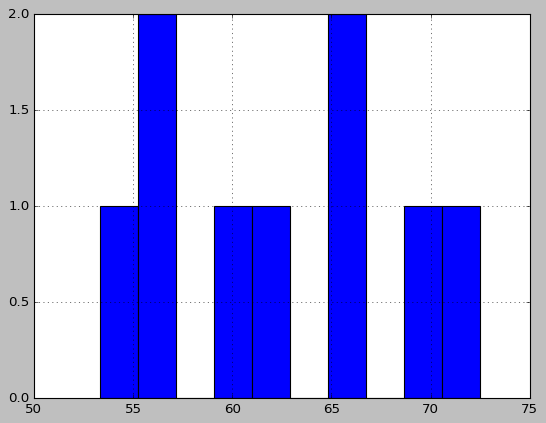

In [22]:
merged_df["2019 income"].hist() #done, but not sure this is great

<Axes: xlabel='Region', ylabel='[2019 income]'>

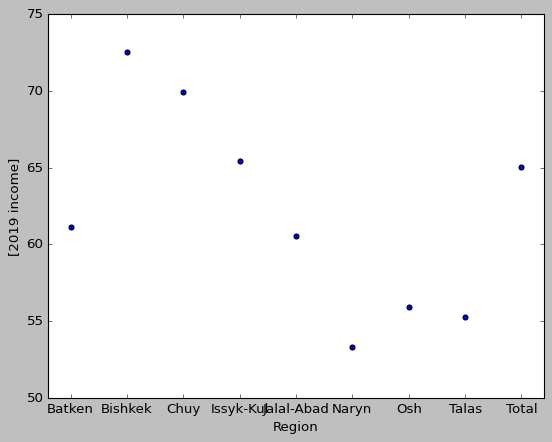

In [23]:
merged_df.plot(kind='scatter', y=['2019 income'], x='Region') #This is what sparked me going back and merging the two files; region vs incomes isn't interesting. Population vs income is!

Text(0.46, 61.14, 'Batken')

Text(1.31, 72.51, 'Bishkek')

Text(0.96, 69.94, 'Chuy')

Text(0.51, 65.4, 'Issyk-Kul')

Text(1.02, 60.53, 'Jalal-Abad')

Text(0.3, 53.33, 'Naryn')

Text(1.62, 55.94, 'Osh')

Text(0.27, 55.28, 'Talas')

Text(6.44, 65.01, 'Total')

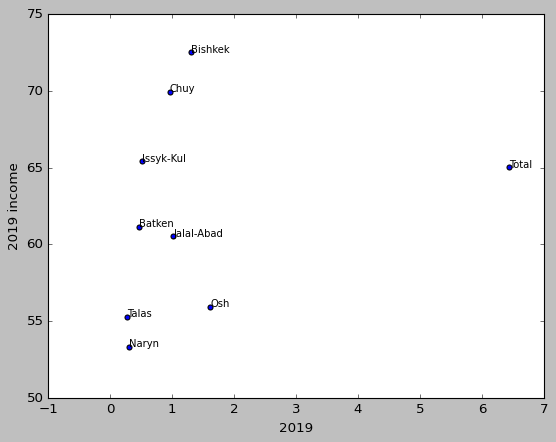

In [24]:
#So apparently, if I want to create a scatterplot with labels, need to use the following code and "ax"...Will learn more to see if there's a differnet way to do it.
ax = merged_df.plot(kind='scatter', x='2019', y='2019 income')
# Add region labels to the plot using the following:
for i, row in merged_df.iterrows():
    ax.text(row['2019'], row['2019 income'], row['Region'], fontsize=9)

Text(0.45, 61.6, 'Batken')

Text(1.42, 68.76, 'Bishkek')

Text(0.95, 66.03, 'Chuy')

Text(0.53, 73.57, 'Issyk-Kul')

Text(0.99, 61.92, 'Jalal-Abad')

Text(0.31, 52.47, 'Naryn')

Text(1.66, 54.55, 'Osh')

Text(0.27, 60.18, 'Talas')

Text(6.57, 64.33, 'Total')

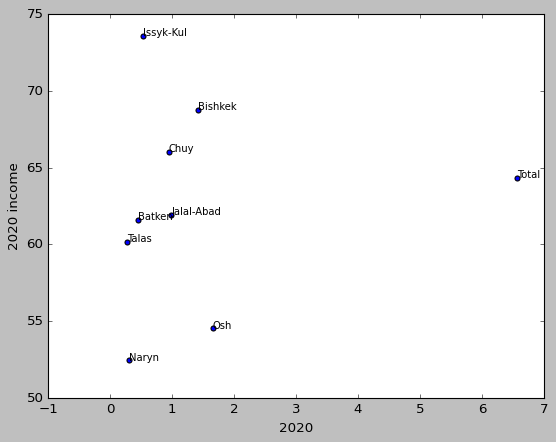

In [25]:
# doing this for 2020 now.
ax = merged_df.plot(kind='scatter', x='2020', y='2020 income')
# Add region labels to the plot
for i, row in merged_df.iterrows():
    ax.text(row['2020'], row['2020 income'], row['Region'], fontsize=9)
#interesting to note Issyk-Kul jumped way up!

In [ ]:
#finalstep, let's get that csv file i merged all downloaded!
from google.colab import files
#convert dataframe to csv
merged_df.to_csv('pop_incomepercapita.csv', index=False)

# Download the file.
files.download('pop_incomepercapita.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Merge 2 - EGRA Data and Disaster Incidence
Will load the EGRA dataset and the Disaster Incidence Data from Inform here.

For the EGRA data, will aggregrate scores by region, after renaming region. Will drop most variables, but will keep the reading comp scores and numeracy scores.

Will clean, rename/replace region, and merge on region





In [ ]:
# let's load the EGRA data
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU/export?format=csv' -O Datareading.csv
#and let's load the inform disaster incidence data
!wget --no-check-certificate "https://docs.google.com/spreadsheets/d/1CMnd_Q6dslsVYN3u1ueaugox47WUwEFQr2R_cqomBys/export?format=csv&gid=16033786" -O disaster.csv
#defining both datasets now
egra = pd.read_csv('Datareading.csv')
disaster = pd.read_csv('disaster.csv')


--2025-02-06 19:45:12--  https://docs.google.com/spreadsheets/d/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU/export?format=csv
Resolving docs.google.com (docs.google.com)... 173.194.212.101, 173.194.212.102, 173.194.212.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/sorfdter3lh065oshkur5t2roc/1738871110000/113781219181981321798/*/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU?format=csv [following]
--2025-02-06 19:45:12--  https://doc-0c-7s-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/sorfdter3lh065oshkur5t2roc/1738871110000/113781219181981321798/*/1Rq8nK25uEKsjwwcu0Sr1IF1oBD6N2BwbmFW5VeiGAfU?format=csv
Resolving doc-0c-7s-sheets.googleusercontent.com (doc-0c-7s-sheets.googleusercontent.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to doc-0c-7s-sheets.googleuser

<ipython-input-20-6955ab79dc54>:6: DtypeWarning: Columns (15,18,19,20,21,22,23,24,25,27,28,30,31,32,33,34,35,36,37,38,39,44,45,46,50,52,58,59,60,67,69,70,71,80,90,95,96,100,101,102,104,108,109,110,115,121,128,132,133,134,136,137,138,139,140,141,146,147,148,152,155,156,157,158,159,167,168,176,178,179,185,192,200,201,212,219,220,229,230,241,242,243,245,253,254,263,267,268,269,271,276,277,278,280,281,290,291,292,293,294,300,301,305,306,307,311,312,313,314,315,323,324,326,327,328,333,337,338,391,392,393,396,397,452,453,454,455,456,457,458,459,460,461,462,463,464,465,468,469,475,476,478,479,485,486,488,489,500,501,503,504,510,511,513,514,520,521,523,524,533,535,549,551,555,559,563,565,567,569,571,572,573,574,575,576,582,583,584,585,586,587,588,592,593,604,605,608,610,624,626,629,630,631,632,633,634,637,638,639,640,642,643,644,645,647,648,649,650,652,653,654,655,660,661,662,663,664,665,667,670,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696

In [ ]:
disaster.head(1)
egra.head(1)
#same issues as in data management. Need to do some initial cleaning on both. Let's start with the disaster file.


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,COUNTRY,FIRST ADMINISTRATIVE LEVEL,ISO3+PCODE,Earthquake,Flood,Landslide,Drought,Natural,Projected conflict risk,Current conflict,...,Infrastructure,LACK OF COPING CAPACITY,INFORM RISK,RISK CLASS,Rank,Reliability Index (*),Number of Missing Datasets,% of Missing Datasets,Recentness data (average years),Ratio of subnational vs national data


,region,district,school_code,language,language_name,urbanrural,loi,school_name,treatment,loi_name,...,location_schooldistrict_level,location_schoolschool_parent,location_schoolschool_id,location_schoolschool_level,ci_,invent_worditem_at_time,oral_readitem_at_time,sil_readitem_at_time,userprofileitem1female,strata1
0,In which region is the student's school located?,In which district is the student's school loca...,School's code within country.,Language of Assessment,For what language of instruction was this scho...,Urban/Rural,School Language(s) of Instruction,schoolname,Treament/Comparison Indicator,School Language(s) of Instruction,...,location_school.District_level,location_school.School_parent,location_school.School_id,location_school.School_level,ci_,invent_word.item_at_time,oral_read.item_at_time,b_oral_read.item_at_time,user-profile.item1.female,strata1


In [ ]:
#let's roll the index 0 up to the column names. Set columns to index 0
disaster.columns = disaster.iloc[0]
#now we need to drop index 0 data entirely
disaster = disaster.drop(0)
#rerun and let's see if it worked this time!
disaster

,COUNTRY,FIRST ADMINISTRATIVE LEVEL,ISO3+PCODE,Earthquake,Flood,Landslide,Drought,Natural,Projected conflict risk,Current conflict,...,Infrastructure,LACK OF COPING CAPACITY,INFORM RISK,RISK CLASS,Rank,Reliability Index (*),Number of Missing Datasets,% of Missing Datasets,Recentness data (average years),Ratio of subnational vs national data
1,(a-z),(a-z),(a-z),(0-10),(0-10),(0-10),(0-10),(0-10),(0-10),(0-10),...,(0-10),(0-10),(0-10),(V.Low-V.High),(1-83),(0-10),(0-54),(0-100%),(0-...),(0-...)
2,Armenia,Aragatsotn,AM02,6.5,4.2,0.0,3.8,4.0,6.9,7.6,...,4.8,5.0,4.8,Medium,32,6.0,1,2%,0.75,0.97
3,Armenia,Ararat,AM03,6.5,8.0,0.0,5.5,5.6,6.9,7.6,...,4.3,4.6,4.7,Medium,33,6.0,1,2%,0.75,0.97
4,Armenia,Armavir,AM04,6.9,6.0,0.0,7.5,5.7,6.9,7.6,...,4.2,4.5,4.7,Medium,33,6.0,1,2%,0.75,0.97
5,Armenia,Gegharkunik,AM05,8.9,3.2,0.5,3.6,5.0,6.9,7.6,...,4.6,4.7,4.6,Medium,35,6.0,1,2%,0.75,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Uzbekistan,Tashkent,UZ1727,7.2,6.7,4.7,5.0,6.0,3.7,4.4,...,4.8,5.0,3.9,Low,51,2.8,0,0%,0.55,1.10
84,Uzbekistan,Tashkent (city),UZ1726,6.8,0.1,0.0,6.2,4.0,3.7,4.4,...,2.4,3.6,3.3,Very Low,66,2.8,0,0%,NaN,1.10
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cool. Now let's change the name of FIRST ADMINISTRATIVE LEVEL to "region". Then filter Country for Kyrgyzstan
disaster.rename(columns={'FIRST ADMINISTRATIVE LEVEL': 'region'}, inplace=True) # Rename the column in place
#and sort!
disaster.rename(columns={'COUNTRY': 'country'}, inplace=True) # Rename the column in place

#cool. Now let's change the name of FIRST ADMINISTRATIVE LEVEL to "region". Then filter Country for Kyrgyzstan
disaster.rename(columns={'FIRST ADMINISTRATIVE LEVEL': 'region'}, inplace=True) # Rename the column in place
#and sort!
disaster.rename(columns={'COUNTRY': 'country'}, inplace=True) # Rename the column in place

#filter to country
disaster = disaster[disaster['country'] == 'Kyrgyzstan']
#let's keep what I need. the regions, and incifdence ratings of natural disasters.
disaster = disaster[['country', 'region', 'Earthquake', 'Flood', 'Landslide', 'Drought', 'Natural']]
disaster

,country,region,Earthquake,Flood,Landslide,Drought,Natural
34,Kyrgyzstan,Batken,5.4,5.7,7.5,7.2,6.5
35,Kyrgyzstan,Bishkek (city),6.5,6.4,0.0,0.0,3.9
36,Kyrgyzstan,Chui,6.8,5.0,8.6,2.0,6.2
37,Kyrgyzstan,Issyk-Kul,8.2,4.7,9.1,2.5,6.9
38,Kyrgyzstan,Jalal-Abad,9.4,7.3,9.4,9.3,9.0
39,Kyrgyzstan,Naryn,5.9,5.2,9.1,2.0,6.2
40,Kyrgyzstan,Osh,9.5,6.5,9.5,7.7,8.6
41,Kyrgyzstan,Osh (city),8.9,7.0,0.0,9.2,7.4
42,Kyrgyzstan,Talas,5.9,5.6,2.5,6.4,5.3


In [ ]:
#let's create a high risk,  medium risk, low risk, no risk classification for natural disasters.
